In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,NaN,-0.23255,NaN,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,NaN,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,NaN,-0.01920,NaN,0.01606,...,0.94520,0.01361,0.93522,0.04925,NaN,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,NaN,-0.01657,NaN,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,NaN,-0.17238,0.96022,-0.03757,NaN,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	18
float64		column 4	0
float64		column 5	18
float64		column 6	0
float64		column 7	37
float64		column 8	0
float64		column 9	37
float64		column 10	0
float64		column 11	55
float64		column 12	0
float64		column 13	54
float64		column 14	0
float64		column 15	19
float64		column 16	0
float64		column 17	73
float64		column 18	0
float64		column 19	18
float64		column 20	0
float64		column 21	55
float64		column 22	18
float64		column 23	37
float64		column 24	0
float64		column 25	18
float64		column 26	0
float64		column 27	18
float64		column 28	0
float64		column 29	73
float64		column 30	0
float64		column 31	0
float64		column 32	0
float64		column 33	36
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,333.000000,351.000000,333.000000,351.000000,314.000000,351.000000,314.000000,351.000000,...,333.000000,351.000000,333.000000,351.000000,278.000000,351.000000,351.000000,351.000000,315.000000,351.000000
mean,0.891738,0.0,0.638979,0.044372,0.605987,0.115889,0.530515,0.119360,0.499558,0.181345,...,0.396614,-0.071187,0.557048,-0.069538,0.381597,-0.027907,0.352514,-0.003794,0.360629,0.014480
std,0.311155,0.0,0.502023,0.441435,0.517344,0.460810,0.504974,0.520750,0.517688,0.483851,...,0.577165,0.508495,0.497656,0.550025,0.577304,0.507974,0.571483,0.513574,0.512048,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.473370,-0.064735,0.427840,-0.024795,0.183663,-0.054840,0.065855,-0.048075,...,0.000000,-0.332390,0.333330,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.870480,0.016310,0.813090,0.022800,0.711970,0.014710,0.673950,0.018290,...,0.553890,-0.015050,0.708860,-0.017690,0.526225,0.000000,0.442770,0.000000,0.421890,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.965225,0.445675,0.950555,0.534195,...,0.900710,0.156765,0.999890,0.153535,0.876750,0.154075,0.857620,0.200120,0.820610,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

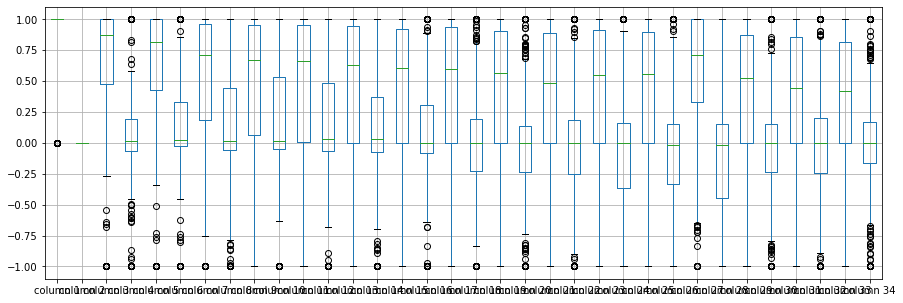

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.638979
column 4     0.044372
column 5     0.605987
column 6     0.115889
column 7     0.530515
column 8     0.119360
column 9     0.499558
column 10    0.181345
column 11    0.472304
column 12    0.155040
column 13    0.385065
column 14    0.093414
column 15    0.337881
column 16    0.071132
column 17    0.367231
column 18   -0.003617
column 19    0.349592
column 20   -0.024025
column 21    0.325467
column 22    0.005655
column 23    0.381652
column 24   -0.057406
column 25    0.396614
column 26   -0.071187
column 27    0.557048
column 28   -0.069538
column 29    0.381597
column 30   -0.027907
column 31    0.352514
column 32   -0.003794
column 33    0.360629
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.308751,-0.006529,0.165041,0.127606,0.220047,0.027079,0.193090,-0.051883,...,-0.002014,0.149789,-0.226676,-0.010725,0.135437,-0.121415,0.167031,-0.100914,0.160202,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.308751,NaN,1.000000,0.145144,0.463015,0.027110,0.436405,0.014699,0.498249,0.036348,...,0.332725,-0.069714,0.023491,0.102507,0.341846,0.052326,0.227565,-0.010558,0.257168,-0.005490
column 4,-0.006529,NaN,0.145144,1.000000,-0.014206,-0.190308,-0.036039,0.255003,-0.295772,0.207697,...,-0.096128,-0.236987,-0.043669,0.000743,-0.040150,0.342301,-0.172276,-0.122788,-0.159876,0.034608
column 5,0.165041,NaN,0.463015,-0.014206,1.000000,0.033972,0.598966,-0.026594,0.458571,-0.047727,...,0.260909,-0.033158,0.110473,0.148759,0.252022,0.038743,0.385842,0.009520,0.353444,-0.098110
column 6,0.127606,NaN,0.027110,-0.190308,0.033972,1.000000,-0.002410,0.274747,-0.115778,0.200080,...,-0.190080,0.041787,-0.205953,-0.068775,-0.050634,-0.158090,-0.100240,0.316802,-0.043765,0.185215
column 7,0.220047,NaN,0.436405,-0.036039,0.598966,-0.002410,1.000000,-0.126608,0.436808,-0.075315,...,0.298264,0.072654,0.081756,0.118971,0.286757,-0.005914,0.418193,0.004106,0.551131,-0.077278
column 8,0.027079,NaN,0.014699,0.255003,-0.026594,0.274747,-0.126608,1.000000,-0.314259,0.373567,...,-0.189433,-0.133023,-0.265667,0.072373,-0.154209,0.078585,-0.166682,0.152381,-0.225778,0.360610
column 9,0.193090,NaN,0.498249,-0.295772,0.458571,-0.115778,0.436808,-0.314259,1.000000,-0.246210,...,0.388503,0.096599,0.152213,0.161923,0.356654,-0.023953,0.313902,-0.045007,0.320482,-0.083165
column 10,-0.051883,NaN,0.036348,0.207697,-0.047727,0.200080,-0.075315,0.373567,-0.246210,1.000000,...,-0.246796,-0.043680,-0.234379,0.072018,-0.111620,-0.008578,-0.155661,-0.015640,-0.177291,0.098104


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+12,34+12+12,34+12+12+12,34+12+12+12+12,34+12+12+12,34+12+12,34+12,34], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.16801507132394
Epoch: 1 , loss: 19.151367596217565
Epoch: 2 , loss: 19.096413294474285
Epoch: 3 , loss: 19.05779793148949
Epoch: 4 , loss: 19.1655942826044
Epoch: 5 , loss: 18.979817072550457
Epoch: 6 , loss: 18.933456693376815
Epoch: 7 , loss: 18.941418193635485
Epoch: 8 , loss: 18.90502302987235
Epoch: 9 , loss: 18.902257556007022
Epoch: 10 , loss: 18.8967038109189
Epoch: 11 , loss: 18.65030029841832
Epoch: 12 , loss: 18.598932175409224
Epoch: 13 , loss: 18.469686008635023
Epoch: 14 , loss: 18.428796223231725
Epoch: 15 , loss: 17.95278521946498
Epoch: 16 , loss: 17.763179824465798
Epoch: 17 , loss: 17.111345563616073
Epoch: 18 , loss: 16.883750098092214
Epoch: 19 , loss: 16.634942145574662
Epoch: 20 , loss: 16.58054211026146
Epoch: 21 , loss: 16.602080299740745
Epoch: 22 , loss: 16.567683628627233
Epoch: 23 , loss: 16.547378948756627
Epoch: 24 , loss: 16.50520288376581
Epoch: 25 , loss: 16.5531419

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
2,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0,0,0.000000,0.0,0.000000,0.0,-0.452312,0.0,-0.288874,0.0,...,0.0,0.0,0.0,0.0,0.368892,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
347,0,0,0.000000,0.0,0.000000,0.0,-0.443685,0.0,-0.446306,0.0,...,0.0,0.0,0.0,0.0,-0.528187,0.0,0.0,0.0,0.00000,0.0
348,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
349,0,0,-0.531451,0.0,-0.605358,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,-0.545142,0.0,0.0,0.0,-0.60509,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

12.374059687652045

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.18074830685282256

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.995390,-0.05889,0.852430,0.02306,0.833980,-0.37708,1.000000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.212660,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.000000,-0.18829,0.930350,-0.36156,-0.108680,-0.93597,1.000000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.190400,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.000000,-0.03365,1.000000,0.00485,1.000000,-0.12062,0.889650,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.431000,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.000000,-0.45161,1.000000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.000000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.000000,-0.02401,0.941400,0.06531,0.468748,-0.23255,0.482646,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.393202,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835080,0.08298,0.737390,-0.14706,0.843490,-0.05567,0.904410,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.000000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.951130,0.00419,0.951830,-0.02723,0.490695,-0.01920,0.499594,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.403403,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.947010,-0.00034,0.932070,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.921200,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.374629,-0.01657,0.375862,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.284688,-0.17238,0.96022,-0.03757,0.26894,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_AG_5(imp).xlsx", index=False, header=False)